In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f_birth = pd.read_csv('daily-total-female-births-CA.csv',index_col=[0],parse_dates=[0])

In [4]:
print(f_birth.head(n=1))
print(f_birth.describe())
print(f_birth.info())

            births
date              
1959-01-01      35
           births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
None


In [5]:
f_brth_seris = f_birth.squeeze()
type(f_brth_seris)

pandas.core.series.Series

In [6]:
# Smooth it using moving averages
# Using rolling Window Techinque
f_birth_mean = f_birth.rolling(window=21).mean() # 21 days 

<AxesSubplot:title={'center':'After Smoothing'}, xlabel='date'>

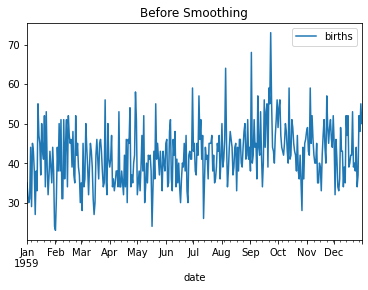

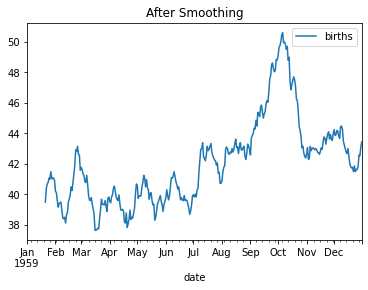

In [7]:
f_birth.plot(title="Before Smoothing")
f_birth_mean.plot(title="After Smoothing")

In [ ]:
# d= 1 as almost no Trend of seasonality


# Base Line Model Fitting

In [62]:
# We well predict the current value by the previous value

In [8]:
df = pd.concat([f_birth,f_birth.shift(1)],axis = 1)
df.columns=['Actual Birth','Forcasted Birth']
df.head()

,Actual Birth,Forcasted Birth
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [10]:
# Lets see the error
df_1 = df[1:] # Removing the 1st Row which contains a NaN value
df_1.head()

,Actual Birth,Forcasted Birth
date,,
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
1959-01-06,29,44.0


In [11]:
# We will use sk learns MSE function
from sklearn.metrics import mean_squared_error
error = mean_squared_error(df_1['Actual Birth'],df_1['Forcasted Birth'])
print('Root Mean Square Error:', np.sqrt(error))

Root Mean Square Error: 9.177283229394606


In [80]:
# That means with this basic model we are getting +/- 9.177 error per presiction of birth

In [82]:
# ARIMA = Auto Regressive Integrated Moving Average (Here the Moving average is nothing but the smoothing part)

In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

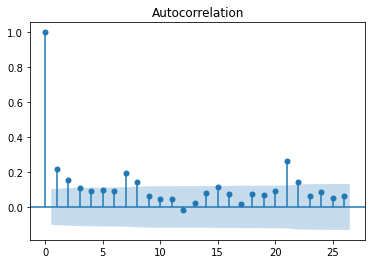

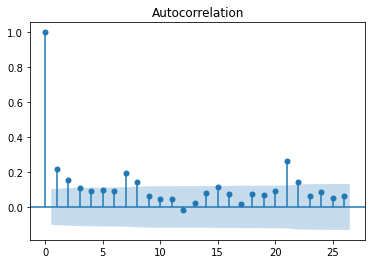

In [13]:
plot_acf(f_birth) # To identify parameter q

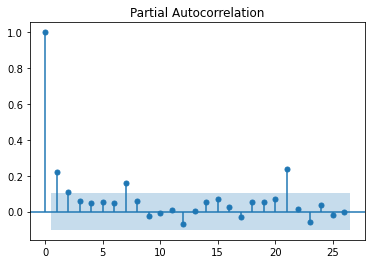

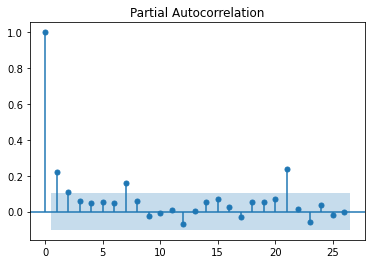

In [15]:
plot_pacf(f_birth) # to identify the value of p

In [16]:
# p = 2,3

In [17]:
# train test split

In [21]:
b_train = f_birth[0:330]
b_test = f_birth[330:]

In [22]:
# ARIMA fitting
from statsmodels.tsa.arima_model import ARIMA

In [105]:
birth_model = ARIMA(b_train,order=(3,1,3))

C:\Users\Ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

In [106]:
birth_model_fit = birth_model.fit()

C:\Users\Ujjwa\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [107]:
birth_model_fit.aic # Lower is better

2225.7918964991004

In [108]:
birth_forecast = birth_model_fit.forecast(steps = 35)
#print(birth_forecast[0])
#print(b_test.values.flatten())
pd.DataFrame({'Actual':b_test.values.flatten(),'Predicted':birth_forecast[0]},
             index=b_test.index)

,Actual,Predicted
date,,
1959-11-27,51,44.598993
1959-11-28,46,44.350881
1959-11-29,44,44.910410
1959-11-30,52,45.615458
1959-12-01,45,45.929839
1959-12-02,32,45.632082
1959-12-03,46,44.965427
1959-12-04,41,44.450193
1959-12-05,34,44.489121


In [109]:
#Error
f_error = np.sqrt(mean_squared_error(b_test,birth_forecast[0]))
print('RMSE is=',f_error)

RMSE is= 6.724332980144975
